In [1]:
# Import libraries
import pandas as pd
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [2]:
# Reading data
series = pd.read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True,squeeze=True)
len(series)

144

In [52]:
series.tail()

Month
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, dtype: int64

In [ ]:
# Different tsa  visualisations for the data

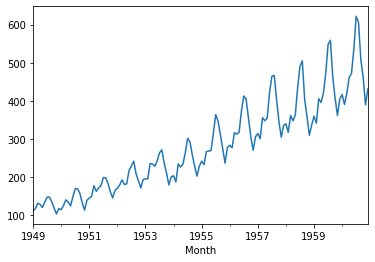

In [4]:
series.plot()
pyplot.show()

<AxesSubplot:>

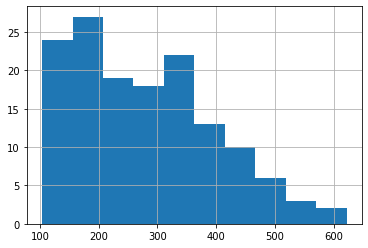

In [5]:
series.hist()

<AxesSubplot:ylabel='Density'>

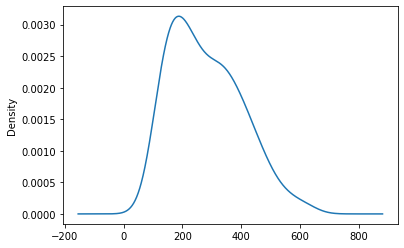

In [6]:
series.plot(kind='kde')

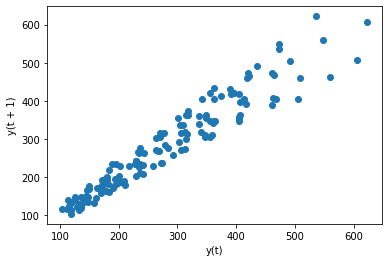

In [91]:
from pandas.plotting import lag_plot

lag_plot(series, lag =1)
pyplot.show()


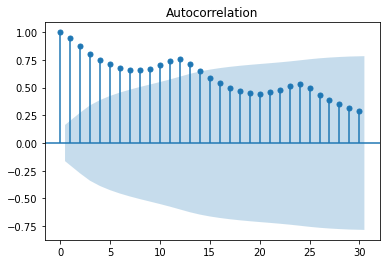

In [92]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series,lags=30)
pyplot.show()

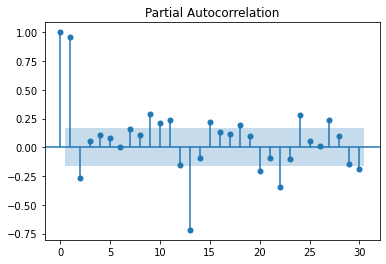

In [93]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series,lags=30)
pyplot.show()

In [7]:
# separate out a validation dataset
split_point = len(series) - 25
dataset, validation = series[0:split_point], series[split_point:]


In [8]:
# saving the test and train as datasets
dataset.to_csv('dataset2.csv', header=False)
validation.to_csv('validation2.csv', header=False)

# Building Model

In [9]:
# reading values to X variable

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt


In [14]:
# building a base model for evaluating parameters

def evaluate_arima_model(X, arima_order):
    X = X.astype('float32')
    split_size = int(len(X) * 0.60)
    train, test = X[0:split_size], X[split_size:]
    pastdata = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(pastdata, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        pastdata.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [15]:
# evaluating model for different p, d and q values for an ARIMA model

def evaluate_models(data, p, d, q):
    
    data = data.astype('float32')
    best_score, best_cfg = float('inf'), None
    
    p_values = range(0, p+1)
    d_values = range(0, d+1)
    q_values = range(0, q+1)
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(data, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [16]:
warnings.filterwarnings("ignore")
# giving base parameters and data for best values

train = pd.read_csv('dataset2.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p = 3
d = 2
q = 3

evaluate_models(train.values, p, d, q)

ARIMA(0, 0, 0) RMSE=138.002
ARIMA(0, 0, 1) RMSE=73.075
ARIMA(0, 1, 0) RMSE=38.874
ARIMA(0, 1, 1) RMSE=36.248
ARIMA(0, 1, 2) RMSE=38.372
ARIMA(0, 1, 3) RMSE=36.680
ARIMA(0, 2, 0) RMSE=44.479
ARIMA(0, 2, 1) RMSE=39.595
ARIMA(0, 2, 2) RMSE=36.769
ARIMA(0, 2, 3) RMSE=37.187
ARIMA(1, 0, 0) RMSE=39.187
ARIMA(1, 0, 1) RMSE=36.315
ARIMA(1, 0, 2) RMSE=36.490
ARIMA(1, 1, 0) RMSE=37.038
ARIMA(1, 1, 1) RMSE=37.524
ARIMA(1, 2, 0) RMSE=44.199
ARIMA(2, 0, 0) RMSE=37.030
ARIMA(2, 1, 0) RMSE=36.501
ARIMA(2, 1, 1) RMSE=32.119
ARIMA(2, 2, 0) RMSE=42.345
ARIMA(3, 0, 0) RMSE=36.630
ARIMA(3, 0, 1) RMSE=34.263
ARIMA(3, 1, 0) RMSE=36.768
ARIMA(3, 1, 1) RMSE=32.296
ARIMA(3, 2, 0) RMSE=42.827
Best ARIMA(2, 1, 1) RMSE=32.119


#### Build Model based on the optimized values

In [17]:
# load data
train = pd.read_csv('dataset2.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

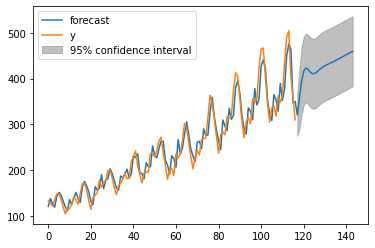

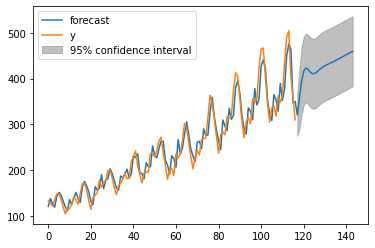

In [18]:
# fitting the model with best parameters

model = ARIMA(X, order=(2,1,1))
model_fit = model.fit()
forecast=model_fit.forecast(steps=25)[0]
model_fit.plot_predict(1,144)

In [19]:
#finding the error for the test data

val=pd.read_csv('validation2.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

73.14441097686897

In [ ]:
# though the error seems low from the plot it is  not convincing that the model is good

# so after repeated evaluation of differest parameters (8,1,2) seems better parameters

#### Combine train and test data and build final model

In [20]:
# now with the parameters and whole date we will fit the model

X = series.values
X = X.astype('float32')

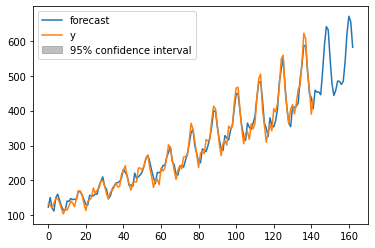

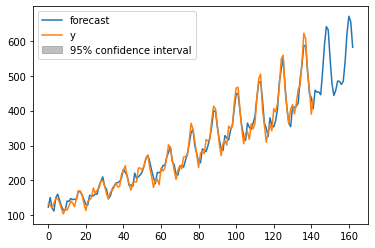

In [90]:
model = ARIMA(X, order=(8,1,2))
model_fit = model.fit()
forecast=model_fit.forecast(steps=20)[0]
model_fit.plot_predict(2,164)

# now it seems a good fit

In [86]:
# the forecast values are as below
forecast

array([458.70971909, 452.82398041, 453.60599422, 445.47094268,
       512.08662576, 588.89955346, 640.90503821, 631.31518819,
       548.57693793, 477.43337237, 443.30776129, 458.39542084,
       484.86998074, 483.65102851, 475.06165005, 484.34963402,
       541.81225453, 622.8260443 , 670.60922341, 653.91485828])